
Hasil Prototipe Cepat dengan Random Forest:
Akurasi: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       160
           1       0.87      0.96      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


Hasil Pipeline dengan StandardScaler dan Random Forest:
Akurasi: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       160
           1       0.87      0.96      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


Best Parameters dari GridSearchCV: {'rf__max_depth': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best Cross-Validation Score: 0.9314285714285713

Hasil Model dengan Parameter

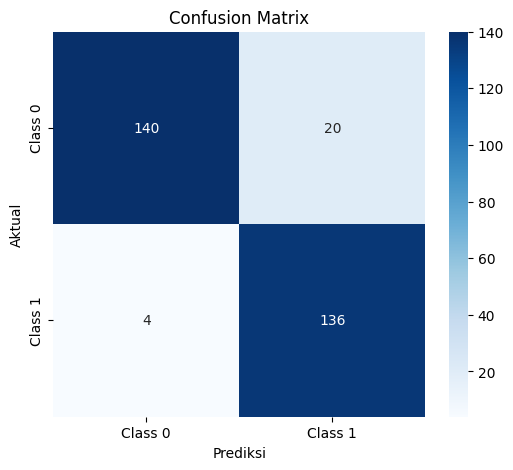


Kesimpulan:
1. Pendekatan cepat dengan Random Forest memberikan gambaran awal performa model.
2. Pipeline menyederhanakan integrasi preprocessing dan pelatihan model.
3. Hyperparameter tuning dengan GridSearchCV meningkatkan performa model.
4. Visualisasi Confusion Matrix membantu menganalisis prediksi secara mendetail.

Langkah Berikutnya:
- Evaluasi model pada dataset lebih besar atau dunia nyata.
- Pertimbangkan pendekatan lain seperti Neural Networks jika data lebih kompleks.
- Pastikan sistem produksi menangani data baru dengan preprocessing yang sama.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pendekatan untuk Masalah Machine Learning
# Membuat dataset sintetis untuk klasifikasi
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Penjelasan:
# Dataset digunakan untuk mendemonstrasikan pendekatan machine learning dari prototipe hingga evaluasi.

# 2. Prototipe Cepat dengan Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nHasil Prototipe Cepat dengan Random Forest:")
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Penjelasan:
# Model Random Forest digunakan untuk membuat prototipe cepat, menghasilkan hasil awal untuk data uji.

# 3. Pipeline dan Preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pipeline_pred = pipeline.predict(X_test)

print("\nHasil Pipeline dengan StandardScaler dan Random Forest:")
print("Akurasi:", accuracy_score(y_test, y_pipeline_pred))
print(classification_report(y_test, y_pipeline_pred))

# Penjelasan:
# Pipeline digunakan untuk menggabungkan preprocessing dan model dalam satu alur.

# 4. Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters dari GridSearchCV:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Menggunakan model terbaik
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)

print("\nHasil Model dengan Parameter Terbaik:")
print("Akurasi:", accuracy_score(y_test, y_best_pred))
print(classification_report(y_test, y_best_pred))

# 5. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_best_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Penjelasan:
# Confusion matrix memberikan gambaran rinci tentang prediksi yang benar dan salah pada data uji.

# 6. Kesimpulan dan Langkah Berikutnya
print("\nKesimpulan:")
print("1. Pendekatan cepat dengan Random Forest memberikan gambaran awal performa model.")
print("2. Pipeline menyederhanakan integrasi preprocessing dan pelatihan model.")
print("3. Hyperparameter tuning dengan GridSearchCV meningkatkan performa model.")
print("4. Visualisasi Confusion Matrix membantu menganalisis prediksi secara mendetail.")
print("\nLangkah Berikutnya:")
print("- Evaluasi model pada dataset lebih besar atau dunia nyata.")
print("- Pertimbangkan pendekatan lain seperti Neural Networks jika data lebih kompleks.")
print("- Pastikan sistem produksi menangani data baru dengan preprocessing yang sama.")
